In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('default')
sns.set_palette("husl")

In [2]:
df = pd.read_excel('data_penerima_bantuan.xlsx', sheet_name='Penerima Bantuan')
df_valid = df[(df['id'].notna()) & (df['nama'].notna()) & (df['id'] < 900)].reset_index(drop=True)

In [3]:
numeric_cols = df_valid.columns[4:22]
for col in numeric_cols:
    df_valid[col] = pd.to_numeric(df_valid[col], errors='coerce').fillna(0)

X = df_valid[numeric_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_valid['cluster'] = kmeans.fit_predict(X_scaled) 
df_valid['skor_utama'] = df_valid.iloc[:, 21]
df_valid['prioritas'] = df_valid['cluster'].map({0: 'Tinggi', 1: 'Sedang', 2: 'Rendah'})

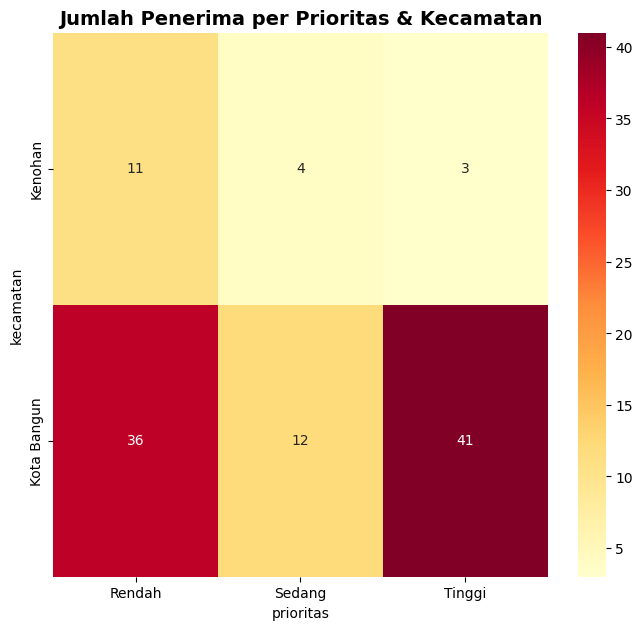

Diagram berhasil dibuat & disimpan: 'diagram_cluster_prioritas.png'

Ringkasan Cluster:
                     id skor_utama            
                  count       mean   min   max
cluster prioritas                             
0       Tinggi       44      29.09  18.0  39.0
1       Sedang       16      71.12  61.0  89.0
2       Rendah       47      49.91  40.0  59.0


In [4]:
fig = plt.figure(figsize=(20, 12))
ax5 = plt.subplot(2, 3, 5)
pivot = df_valid.pivot_table(values='id', index='kecamatan', columns='prioritas', 
                           aggfunc='count', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd', ax=ax5)
plt.title('Jumlah Penerima per Prioritas & Kecamatan', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('diagram_cluster_prioritas.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diagram berhasil dibuat & disimpan: 'diagram_cluster_prioritas.png'")
print("\nRingkasan Cluster:")
print(df_valid.groupby(['cluster', 'prioritas']).agg({
    'id': 'count',
    'skor_utama': ['mean', 'min', 'max']
}).round(2))

In [5]:
print(" TABEL PRIORITAS VERIFIKASI - NAMA LENGKAP")
print("="*120)
for cluster_num in [0, 1, 2]:
    prioritas = ['Tinggi', 'Sedang', 'Rendah'][cluster_num]
    print(f"\n CLUSTER {cluster_num} - PRIORITAS {prioritas.upper()}")
    print("-" * 120)
    
   
    cluster_data = df_valid[df_valid['cluster'] == cluster_num][
        ['id', 'nama', 'kecamatan', 'skor_utama', 'prioritas']
    ].sort_values('skor_utama', ascending=False).head(20)
    
    
    print(cluster_data.to_string(index=False, max_colwidth=25))
    print(f"\n Total di cluster ini: {len(df_valid[df_valid['cluster'] == cluster_num])} orang")
    print(f"Skor rata-rata: {df_valid[df_valid['cluster'] == cluster_num]['skor_utama'].mean():.1f}")
    print("-" * 120)

 TABEL PRIORITAS VERIFIKASI - NAMA LENGKAP

 CLUSTER 0 - PRIORITAS TINGGI
------------------------------------------------------------------------------------------------------------------------
   id        nama   kecamatan  skor_utama prioritas
115.0   IRMANSYAH Kota Bangun        39.0    Tinggi
 53.0    BUDIARTO Kota Bangun        37.0    Tinggi
 82.0 DARLANSAHNI Kota Bangun        37.0    Tinggi
119.0     MANSYAH Kota Bangun        37.0    Tinggi
120.0 MUS MULIADI Kota Bangun        36.0    Tinggi
 39.0      ANTOYO Kota Bangun        36.0    Tinggi
 76.0    RIFADDIN Kota Bangun        35.0    Tinggi
109.0    SUDIRMAN Kota Bangun        35.0    Tinggi
 84.0     KARNITI Kota Bangun        35.0    Tinggi
 80.0         AYA Kota Bangun        35.0    Tinggi
 77.0      TAHLIN Kota Bangun        34.0    Tinggi
 78.0        TIKO Kota Bangun        34.0    Tinggi
 42.0       SISIP Kota Bangun        33.0    Tinggi
 26.0    IWANSYAH     Kenohan        33.0    Tinggi
 58.0      ROHANA Kota Ba